In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LOAD AND PREPROCESS CIFAR 10 DATASET
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train, x_test= x_train/255.0, x_test/2550
y_train, y_test= to_categorical(y_train), to_categorical(y_test)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# PRINT VARIABLE SHAPE
print(f'TRAINING DATASHAPE: {x_train.shape}')
print(f'TRAINING LABELS: {y_train.shape}')
print(f'TESTING DATASHAPE: {x_test.shape}')
print(f'TEST LABELS: {y_test.shape}')

TRAINING DATASHAPE: (50000, 32, 32, 3)
TRAINING LABELS: (50000, 10)
TESTING DATASHAPE: (10000, 32, 32, 3)
TEST LABELS: (10000, 10)


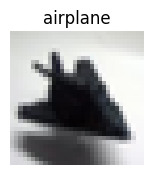

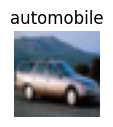

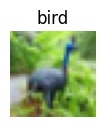

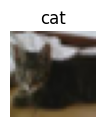

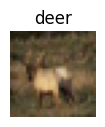

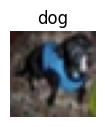

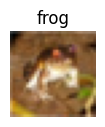

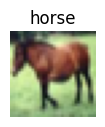

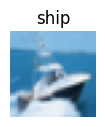

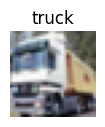

In [4]:
# PRINTING SAMPLE IMAGES FROM EACH CLASS
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(5,5))
for i in range(10):
    class_indices= np.where(np.argmax(y_train, axis=1)==i)[0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[class_indices[0]], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
    plt.show()

In [5]:
# DEFINE CCN MODEL
model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

In [6]:
# COMPILING THE MODEL
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# PRINT MODEL SUMMARY
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
# TRAINING THE MODEL
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5323 - accuracy: 0.4418 - val_loss: 2.9444 - val_accuracy: 0.1183
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1579 - accuracy: 0.5936 - val_loss: 3.2570 - val_accuracy: 0.1566
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0057 - accuracy: 0.6496 - val_loss: 3.3811 - val_accuracy: 0.1649
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9050 - accuracy: 0.6845 - val_loss: 3.6905 - val_accuracy: 0.1383
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8329 - accuracy: 0.7081 - val_loss: 3.1264 - val_accuracy: 0.1658
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7737 - accuracy: 0.7295 - val_loss: 3.3698 - val_accuracy: 0.1739
Epoch 7/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7267 - accuracy: 0.7452 - val_loss: 3.1007 -

In [9]:
# EVALUATE THE MODEL
test_loss, test_acc= model.evaluate(x_test, y_test, verbose=2)
print(f'TEST ACCURACY: {test_acc*100:.2f}%')

313/313 - 3s - loss: 4.2635 - accuracy: 0.1436 - 3s/epoch - 11ms/step
TEST ACCURACY: 14.36%


In [10]:
# PRINT CONFUSION MATRIX AND ROC CURVE
from sklearn.metrics import confusion_matrix , roc_curve, auc
import seaborn as sns

In [11]:
# EVALUATE MODEL
y_pred= model.predict(x_test)
y_pred_classes= np.argmax(y_pred, axis=1)
y_true_classes= np.argmax(y_test, axis=1)

313/313 [==============================] - 4s 12ms/step


In [12]:
# CONFUSION MATRIX
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

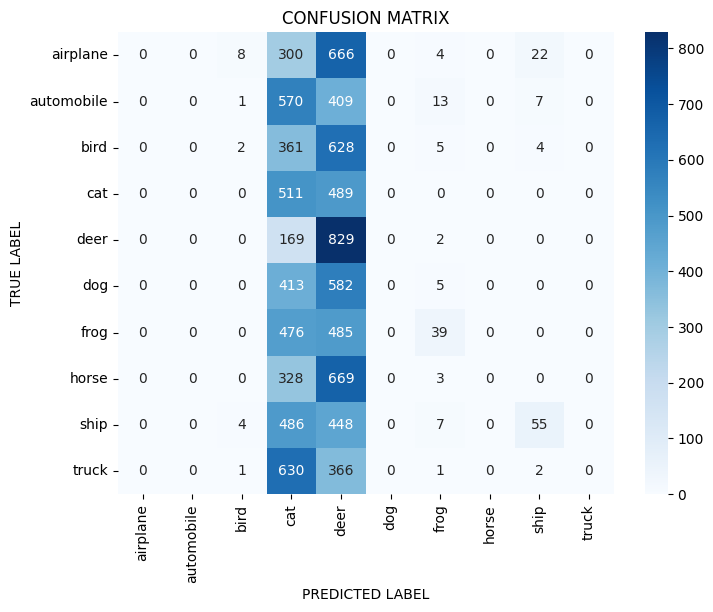

In [13]:
# PLOT CONFUSION MATRIX
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('CONFUSION MATRIX')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.show()

In [14]:
# ROC CURVES
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


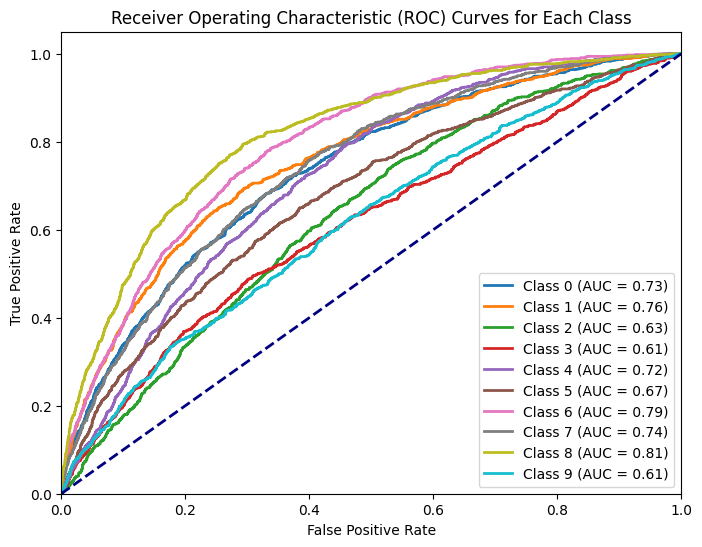

In [15]:
# PLOT ROC CURVE FOR EACH CLASS
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()


In [16]:
# CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.12      0.00      0.00      1000
         cat       0.12      0.51      0.19      1000
        deer       0.15      0.83      0.25      1000
         dog       0.00      0.00      0.00      1000
        frog       0.49      0.04      0.07      1000
       horse       0.00      0.00      0.00      1000
        ship       0.61      0.06      0.10      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.15      0.14      0.06     10000
weighted avg       0.15      0.14      0.06     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
